# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
import json
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
#need left sort to order on the unique "Mouse Ids" instead of timepoints within an ID

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_mouse_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mouse_data = combined_mouse_data.sort_values(["Mouse ID" , "Timepoint"]) - not helpful
duplicate_mouse_data = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID" , "Timepoint"])]  #identifies duplicates
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_data = combined_mouse_data.loc[combined_mouse_data["Mouse ID"]=="g989"]
all_duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#unique_mouse_data = combined_mouse_data.drop_duplicates(subset = ["Mouse ID" , "Timepoint"] , keep=False, inplace=False)
unique_mouse_data = combined_mouse_data.loc[combined_mouse_data ["Mouse ID"]!="g989"]
unique_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_data['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
per_regimen_mean_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#per_regimen_mean_tum_vol #as a check for the result
per_regimen_median_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#per_regimen_median_tum_vol #as a check for the result
per_regimen_variance_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#per_regimen_variance_tum_vol #as a check for the result
per_regimen_stdev_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#per_regimen_stdev_tum_vol #as a check for the result
per_regimen_SEM_tum_vol = unique_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#per_regimen_SEM_tum_vol #as a check for the result
# variation of this with numpy
 
# Assemble the resulting series into a single summary DataFrame.
per_regimen_summaryDF =pd.DataFrame({"Mean Tumor Volume": per_regimen_mean_tum_vol,
                                    "Median Tumor Volume": per_regimen_median_tum_vol,
                                    "Tumor Volume Variance": per_regimen_variance_tum_vol,
                                    "Tumor Volume Std. Dev.": per_regimen_stdev_tum_vol,
                                    "Tumor Volume Std. Err.": per_regimen_SEM_tum_vol})
per_regimen_summaryDF


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#  unique_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(pd.Series.mean, pd.Series.mode) for a start  if time

## Bar and Pie Charts

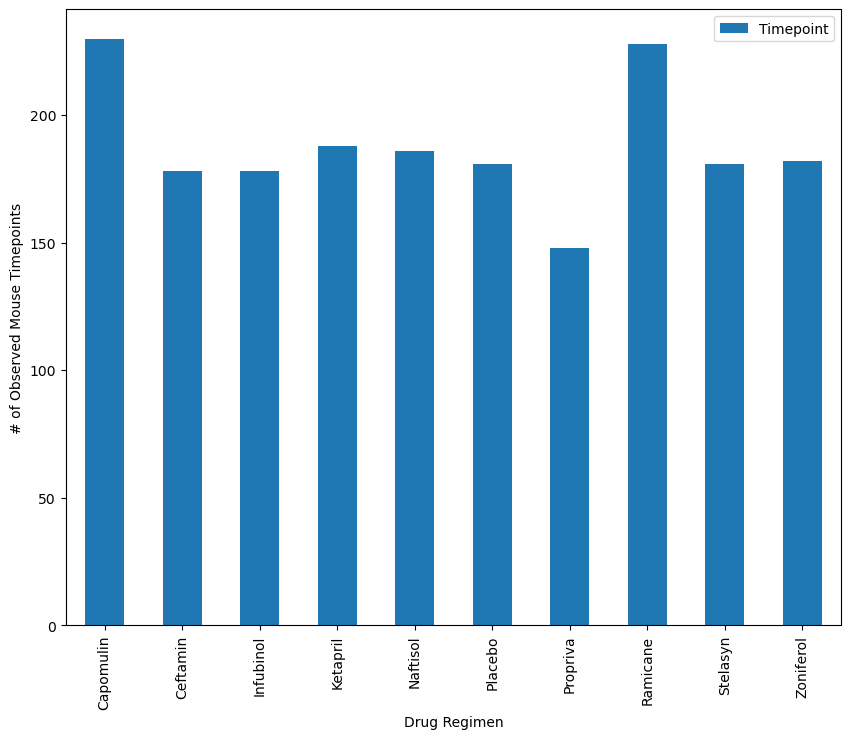

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# create a df of Drug Regimen vs total time points
drug_regimen_timepts_total = unique_mouse_data.groupby('Drug Regimen')['Timepoint'].count()
drug_regimen_timepts_totalDF = pd.DataFrame({"Timepoint": drug_regimen_timepts_total})
#  drug_regimen_timepts_totalDF  #shows the data or Y values for the plot
#   len(drug_regimen_timepts_totalDF) does count 10 rows
#   note example had the data sorted based on timepoints, not clear if that is necessary or why

# Use DataFrame.plot() in order to create a bar chart of the data
drug_regimen_timepts_totalDF.plot(kind="bar", figsize=(10,8))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


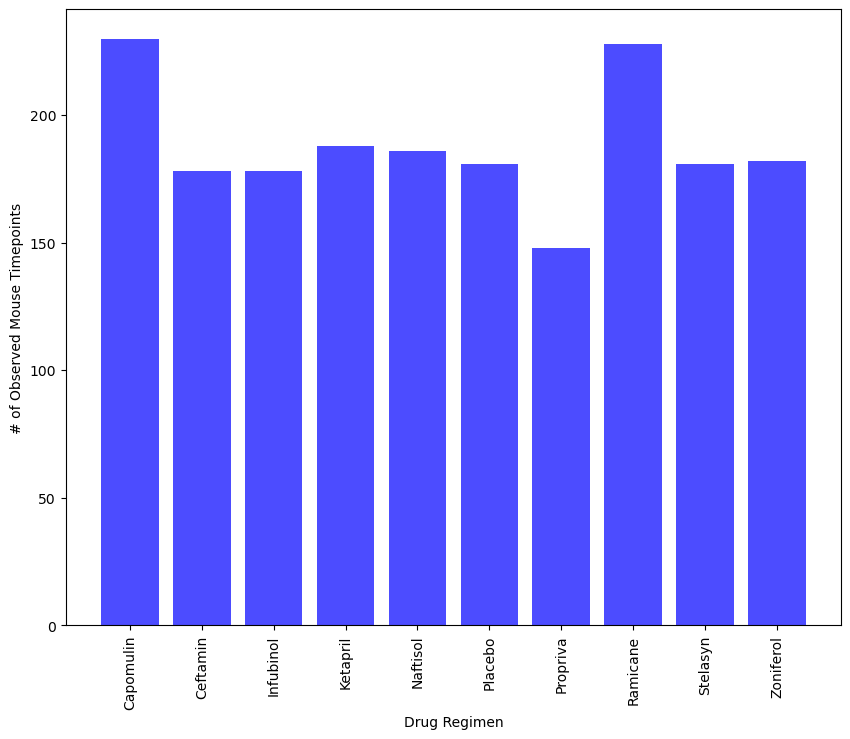

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# note suspect could have created a df not indexed on drug regimen (to autofile x axis labels)

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_timepts_totalDF))
tick_locations = [value for value in x_axis]

# creating bar plot via pyplot
plt.figure(figsize=(10,8))
plt.bar(x_axis, drug_regimen_timepts_totalDF["Timepoint"], color='b', alpha=0.7, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                            "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

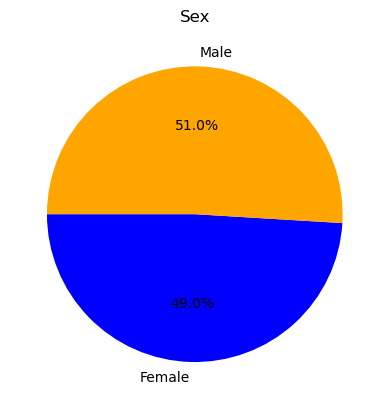

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

unique_mouse_data.groupby('Sex').size().plot(kind='pie', autopct='%1.1f%%', colors=['blue','orange'], startangle=180)
plt.title ("Sex")
plt.show

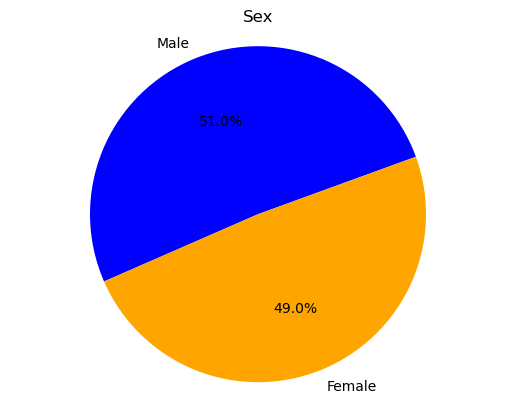

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total_of_male_female = unique_mouse_data["Sex"].value_counts()  # provides total values of each sex
total_of_male_female
frac_male = (958/1880)  #.round(decimals=1)
frac_male
frac_female = (922/1880)
frac_female
sexes = ["Male", "Female"]
percent_values = [51.0, 49.0]

plt.title("Sex")
plt.pie(percent_values, labels=sexes, colors=['blue','orange'],
        autopct="%1.1f%%", startangle=20)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

final_tum_vol = [unique_mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].max()]
final_tum_vol # shows max tumor volumes

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#unique_mouse_fintumvol_data = unique_mouse_data.append({'Final Tumor Volume': final_tum_vol}, ignore_index=True)
#unique_mouse_fintumvol_data = unique_mouse_data['final_tum_vol']
#unique_mouse_fintumvol_data = pd.merge(unique_mouse_data, final_tum_vol, how="left", on="Mouse ID")
#unique_mouse_fintumvol_data.tail(50)



[Mouse ID
 a203    67.973419
 a251    65.525743
 a262    70.717621
 a275    62.999356
 a366    63.440686
           ...    
 z435    48.710661
 z578    45.000000
 z581    62.754451
 z795    65.741070
 z969    73.867845
 Name: Tumor Volume (mm3), Length: 248, dtype: float64]

In [38]:
# Put treatments into a list for for loop (and later for plot labels)

capomulin_data = unique_mouse_data.loc[unique_mouse_data["Drug Regimen"]=="Capomulin"]
#capomulin_data.head()
ramicane_data = unique_mouse_data.loc[unique_mouse_data["Drug Regimen"]=="Ramicane"]
infubinol_data = unique_mouse_data.loc[unique_mouse_data["Drug Regimen"]=="Infubinol"]
ceftamin_data = unique_mouse_data.loc[unique_mouse_data["Drug Regimen"]=="Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []  # for some reason this prevents printing the above list information

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        #  for loop here based on Drug Regimen
    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
